In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder



In [2]:
#Load Data
# datasets\target_model\CICIDS2018\target_model_CICIDS2018data.csv
train = pd.read_csv('../datasets/target_model/CICIDS2018/train.csv')
val = pd.read_csv('../datasets/target_model/CICIDS2018/val.csv')
test = pd.read_csv('../datasets/target_model/CICIDS2018/test.csv')

[Text(0, 0, '10487'), Text(0, 0, '1166'), Text(0, 0, '2914')]

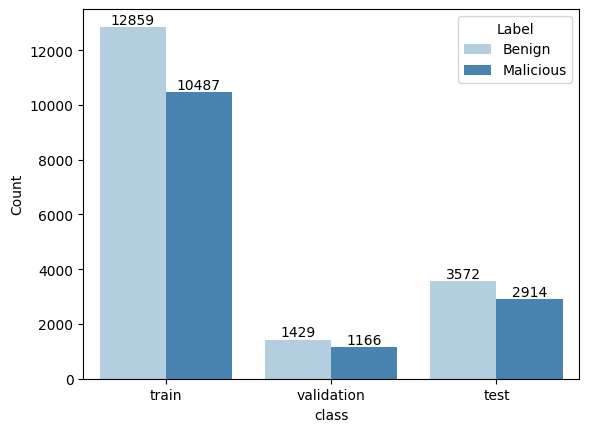

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_distribution = train.value_counts('Label')
train_distribution = train_distribution.reset_index()
train_distribution["class"] = "train"

val_distribution = val.value_counts('Label')
val_distribution = val_distribution.reset_index()
val_distribution["class"] = "validation"

test_distribution = test.value_counts('Label')
test_distribution = test_distribution.reset_index()
test_distribution["class"] = "test"

total_distribution = pd.concat([train_distribution, val_distribution, test_distribution])

total_distribution.columns = ["Label", "Count", "class"]
grade_map = {
    0: "Benign",
    1: "Malicious"}
total_distribution["Label"] = total_distribution["Label"].map(grade_map)

total_distribution
ax = sns.barplot(x="class", y="Count", hue="Label", data=total_distribution, palette="Blues" )
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

In [4]:
X_train = train.drop(['Label'], axis=1)
y_train = train['Label']
X_val = val.drop(['Label'], axis=1)
y_val = val['Label']
X_test = test.drop(['Label'], axis=1)
y_test = test['Label']

### SVM

In [10]:
# from sklearn import svm

# # Training
# svm_start_train = time.time()
# model_svm = svm.SVC(decision_function_shape='ovo')

# model_svm.fit(X_train, y_train)
# svm_end_train = time.time()
# svm_time = svm_end_train - svm_start_train

In [11]:
# # Testing
# svm_start_test = time.time()
# y_pred_svm = model_svm.predict(X_test)
# acc_test_svm = accuracy_score(y_test, y_pred_svm)
# recall_score_test_svm = recall_score(y_test, y_pred_svm, average='weighted')
# svm_end_test = time.time()
# svm_testing_time = svm_end_test - svm_start_test


# # Validation
# svm_start_validation = time.time()
# svm_y_val =  model_svm.predict(X_val)
# svm_val_acc = accuracy_score(y_val, svm_y_val)
# recall_score_val_svm = recall_score(y_val, svm_y_val, average='weighted')
# svm_end_validation = time.time()
# svm_validation_time = svm_end_validation - svm_start_validation

# # Results
# print("svm Classifier")
# print("Accuracy: ", acc_test_svm)
# print("Recall: ", recall_score_test_svm)
# print("Validation Accuracy: ", svm_val_acc)
# print("Validation Recall: ", recall_score_val_svm)
# print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_svm))
# print("Classification report: \n", classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malicious'], digits=4))

In [12]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion Matrix')
# plt.show()

In [13]:
# cm = confusion_matrix(y_test, y_pred_svm, labels=model_svm.classes_)
# total = np.sum(cm)
# confusion_percentage = (cm  / total) * 100

# strings = np.asarray([['%', '%'],
#                     ['%', '%']])
# labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
# plt.xlabel('Predicted Label', fontsize=20)
# plt.ylabel('True Label', fontsize=20)
# plt.title('Confusion Matrix of SVM Target Model', fontsize=20)
# plt.show()

In [14]:
X_train

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMin,FwdPktLenStd,BwdPktLenMax,BwdPktLenMean,BwdPktLenStd,...,FwdHeaderLen.1,SubflowFwdPkts,SubflowFwdByts,IdleStd,SubflowBwdPkts,SubflowBwdByts,InitBwdWinByts,FwdActDataPkts,ActiveStd,ActiveMax
0,1185,1,1,38,118,38,0.00000,118,118.0,0.000000,...,8,1,38,0.0,1,118,-1,0,0.0,0
1,6,1,1,0,0,0,0.00000,0,0.0,0.000000,...,40,1,0,0.0,1,0,0,0,0.0,0
2,30343,2,2,60,228,30,0.00000,114,114.0,0.000000,...,16,2,60,0.0,2,228,-1,1,0.0,0
3,5,1,1,0,0,0,0.00000,0,0.0,0.000000,...,40,1,0,0.0,1,0,0,0,0.0,0
4,7030170,5,3,406,972,0,181.56872,972,324.0,561.184462,...,168,5,406,0.0,3,972,219,1,0.0,1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23341,50,2,0,0,0,0,0.00000,0,0.0,0.000000,...,40,2,0,0.0,0,0,-1,0,0.0,0
23342,88299511,2,0,0,0,0,0.00000,0,0.0,0.000000,...,40,2,0,0.0,0,0,-1,0,0.0,0
23343,46,1,1,0,0,0,0.00000,0,0.0,0.000000,...,20,1,0,0.0,1,0,253,0,0.0,0
23344,2,1,1,0,0,0,0.00000,0,0.0,0.000000,...,40,1,0,0.0,1,0,0,0,0.0,0


In [15]:
y_train

0        0
1        1
2        0
3        1
4        1
        ..
23341    0
23342    0
23343    0
23344    1
23345    0
Name: Label, Length: 23346, dtype: int64

In [16]:
X_train.columns

Index(['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMin', 'FwdPktLenStd', 'BwdPktLenMax',
       'BwdPktLenMean', 'BwdPktLenStd', 'FlowByts/s', 'FlowPkts/s',
       'FlowIATStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATMax', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'BwdPSHFlags', 'FwdHeaderLen',
       'BwdHeaderLen', 'FwdPkts/s', 'BwdPkts/s', 'PktLenMax', 'PktLenStd',
       'FINFlagCnt', 'SYNFlagCnt', 'ACKFlagCnt', 'Down/UpRatio',
       'BwdSegSizeAvg', 'FwdHeaderLen.1', 'SubflowFwdPkts', 'SubflowFwdByts',
       'IdleStd', 'SubflowBwdPkts', 'SubflowBwdByts', 'InitBwdWinByts',
       'FwdActDataPkts', 'ActiveStd', 'ActiveMax'],
      dtype='object')

### DecisionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Testing
dt_start_test = time.time()
y_pred_dt = model_dt.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_dt)
recall_score_test_dt = recall_score(y_test, y_pred_dt, average='weighted')
dt_end_test = time.time()
dt_testing_time = dt_end_test - dt_start_test


# Validation
dt_start_validation = time.time()
dt_y_val =  model_dt.predict(X_val)
dt_val_acc = accuracy_score(y_val, dt_y_val)
recall_score_val_dt = recall_score(y_val, dt_y_val, average='weighted')
dt_end_validation = time.time()
dt_validation_time = dt_end_validation - dt_start_validation

# Results
print("DecisionTree Classifier")
print("Accuracy: ", acc_test_dt)
print("Recall: ", recall_score_test_dt)
print("Validation Accuracy: ", dt_val_acc)
print("Validation Recall: ", recall_score_val_dt)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification report: \n", classification_report(y_test, y_pred_dt, target_names=['Benign', 'Malicious'], digits=4))

DecisionTree Classifier
Accuracy:  0.9983040394696269
Recall:  0.9983040394696269
Validation Accuracy:  0.9973025048169557
Validation Recall:  0.9973025048169557
Confusion matrix: 
 [[3566    6]
 [   5 2909]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9986    0.9983    0.9985      3572
   Malicious     0.9979    0.9983    0.9981      2914

    accuracy                         0.9983      6486
   macro avg     0.9983    0.9983    0.9983      6486
weighted avg     0.9983    0.9983    0.9983      6486



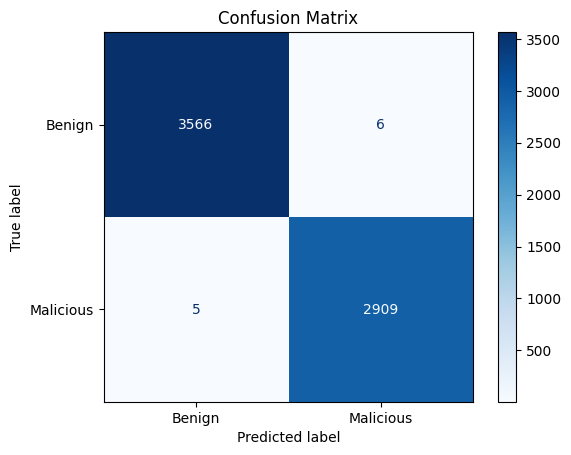

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

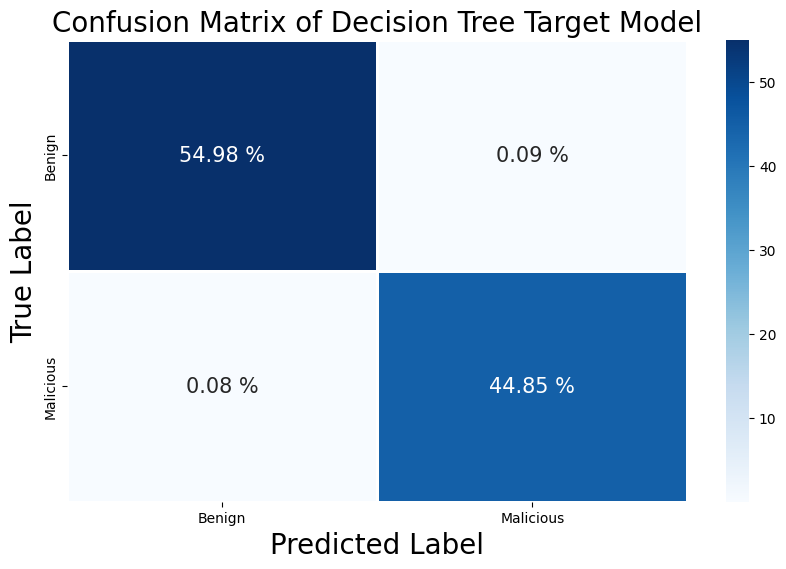

In [20]:
cm = confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Decision Tree Target Model', fontsize=20)
plt.show()

### LogisticRegression

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [22]:
# Testing
lr_start_test = time.time()
y_pred_lr = model_lr.predict(X_test)
acc_test_lr = accuracy_score(y_test, y_pred_lr)
recall_score_test_lr = recall_score(y_test, y_pred_lr, average='weighted')
lr_end_test = time.time()
lr_testing_time = lr_end_test - lr_start_test


# Validation
lr_start_validation = time.time()
lr_y_val =  model_lr.predict(X_val)
lr_val_acc = accuracy_score(y_val, lr_y_val)
recall_score_val_lr = recall_score(y_val, lr_y_val, average='weighted')
lr_end_validation = time.time()
lr_validation_time = lr_end_validation - lr_start_validation

# Results
print("Logistic Regression")
print("Accuracy: ", acc_test_lr)
print("Recall: ", recall_score_test_lr)
print("Validation Accuracy: ", lr_val_acc)
print("Validation Recall: ", recall_score_val_lr)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Classification report: \n", classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malicious'], digits=4))

Logistic Regression
Accuracy:  0.8692568609312366
Recall:  0.8692568609312366
Validation Accuracy:  0.8689788053949904
Validation Recall:  0.8689788053949904
Confusion matrix: 
 [[2990  582]
 [ 266 2648]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9183    0.8371    0.8758      3572
   Malicious     0.8198    0.9087    0.8620      2914

    accuracy                         0.8693      6486
   macro avg     0.8691    0.8729    0.8689      6486
weighted avg     0.8741    0.8693    0.8696      6486



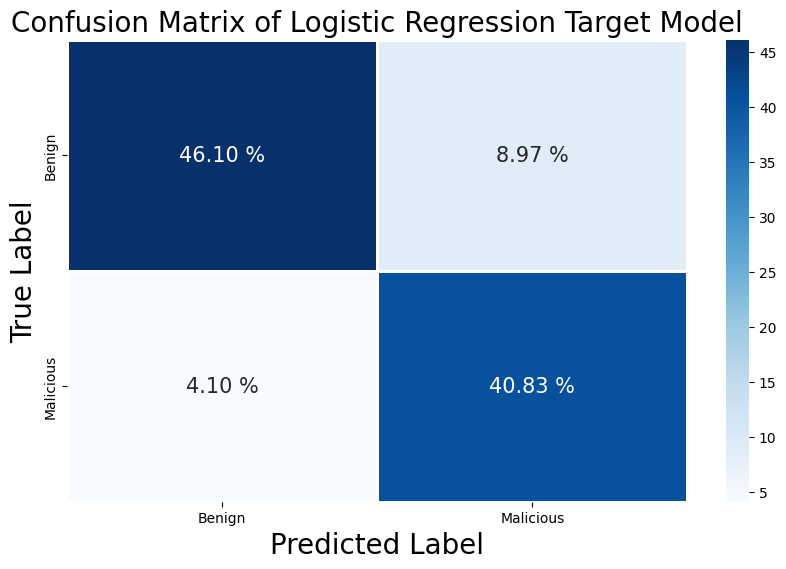

In [23]:
cm = confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Logistic Regression Target Model', fontsize=20)
plt.show()

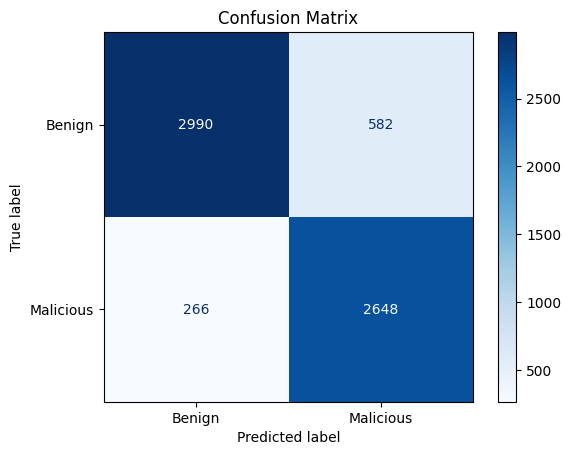

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### randomforest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Training
randomforest_start_train = time.time()
model_randomforest = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)

model_randomforest.fit(X_train, y_train)
randomforest_end_train = time.time()
randomforest_training_time = randomforest_end_train - randomforest_start_train

# Testing
randomforest_start_test = time.time()
y_pred_randomforest = model_randomforest.predict(X_test)
acc_test_randomforest = accuracy_score(y_test, y_pred_randomforest)
recall_score_test_randomforest = recall_score(y_test, y_pred_randomforest, average='weighted')
randomforest_end_test = time.time()
randomforest_testing_time = randomforest_end_test - randomforest_start_test


# Validation
randomforest_start_validation = time.time()
randomforest_y_val =  model_randomforest.predict(X_val)
randomforest_val_acc = accuracy_score(y_val, randomforest_y_val)
recall_score_val_randomforest = recall_score(y_val, randomforest_y_val, average='weighted')
randomforest_end_validation = time.time()
randomforest_validation_time = randomforest_end_validation - randomforest_start_validation

# Results
print("randomforest Classifier")
print("Accuracy: ", acc_test_randomforest)
print("Recall: ", recall_score_test_randomforest)
print("Validation Accuracy: ", randomforest_val_acc)
print("Validation Recall: ", recall_score_val_randomforest)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_randomforest))
print("Classification report: \n", classification_report(y_test, y_pred_randomforest, target_names=['Benign', 'Malicious'], digits=4))

randomforest Classifier
Accuracy:  0.9984582176996608
Recall:  0.9984582176996608
Validation Accuracy:  0.9984585741811175
Validation Recall:  0.9984585741811175
Confusion matrix: 
 [[3570    2]
 [   8 2906]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9978    0.9994    0.9986      3572
   Malicious     0.9993    0.9973    0.9983      2914

    accuracy                         0.9985      6486
   macro avg     0.9985    0.9983    0.9984      6486
weighted avg     0.9985    0.9985    0.9985      6486



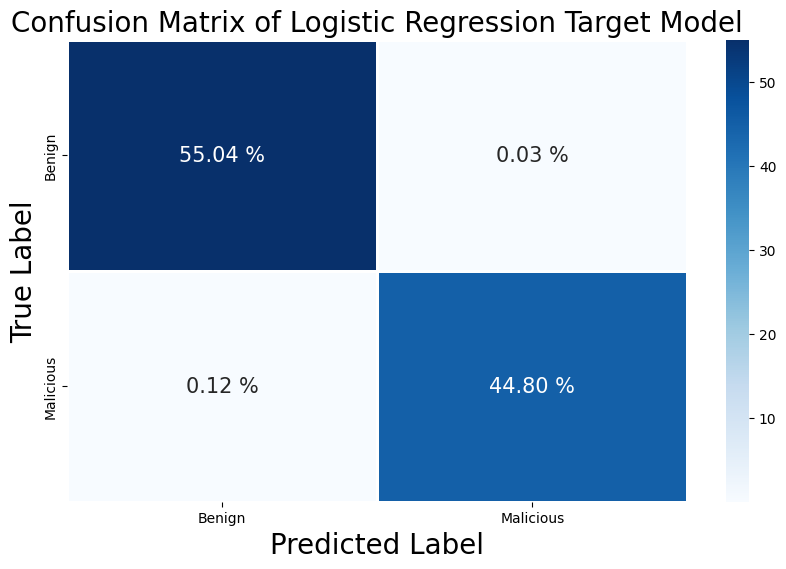

In [26]:
cm = confusion_matrix(y_test, y_pred_randomforest, labels=model_randomforest.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Logistic Regression Target Model', fontsize=20)
plt.show()

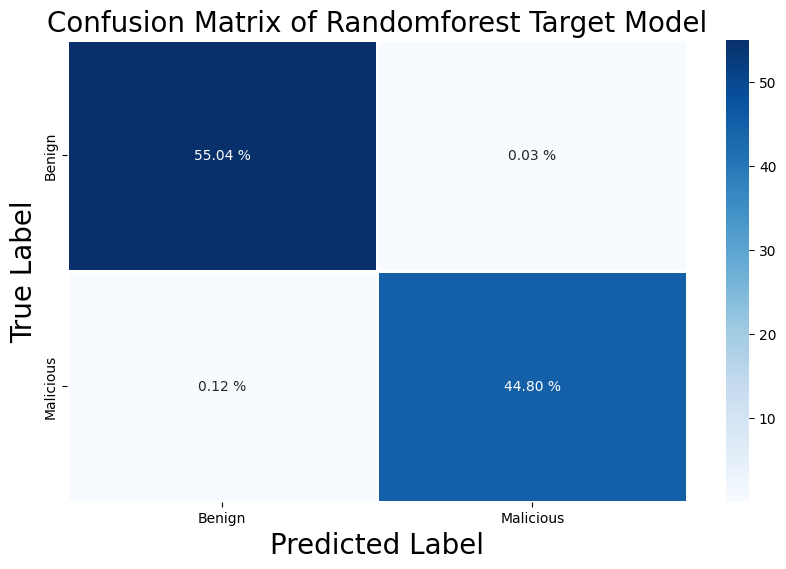

In [27]:
cm = confusion_matrix(y_test, y_pred_randomforest, labels=model_randomforest.classes_)
total = np.sum(cm )
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Randomforest Target Model', fontsize=20)
plt.show()

### Xgboost

In [28]:
# import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Training
xgb_start_train = time.time()
model_xgb = xgb.XGBClassifier(
    early_stopping_rounds=10,
    # device = device
)

# cupy_X_train = cupy.array(X_train)
# cupy_X_test = cupy.array(X_test)
# cupy_X_val = cupy.array(X_val)
# cupy_y_train = cupy.array(y_train)
# cupy_y_test = cupy.array(y_test)
# cupy_y_val = cupy.array(y_val)

model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
xgb_end_train = time.time()
xgb_training_time = xgb_end_train - xgb_start_train

In [29]:
# Testing
xgb_start_test = time.time()
y_pred_xgb = model_xgb.predict(X_test)
acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
recall_score_test_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_end_test = time.time()
xgb_testing_time = xgb_end_test - xgb_start_test


# Validation
xgb_start_validation = time.time()
xgb_y_val =  model_xgb.predict(X_val)
xgb_val_acc = accuracy_score(y_val, xgb_y_val)
recall_score_val_xgb = recall_score(y_val, xgb_y_val, average='weighted')
xgb_end_validation = time.time()
xgb_validation_time = xgb_end_validation - xgb_start_validation

# Results
print("XGBoost Classifier")
print("Accuracy: ", acc_test_xgb)
print("Recall: ", recall_score_test_xgb)
print("Validation Accuracy: ", xgb_val_acc)
print("Validation Recall: ", recall_score_val_xgb)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("Classification report: \n", classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Malicious'], digits=4))

XGBoost Classifier
Accuracy:  0.9989207523897625
Recall:  0.9989207523897625
Validation Accuracy:  0.9980732177263969
Validation Recall:  0.9980732177263969
Confusion matrix: 
 [[3567    5]
 [   2 2912]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9994    0.9986    0.9990      3572
   Malicious     0.9983    0.9993    0.9988      2914

    accuracy                         0.9989      6486
   macro avg     0.9989    0.9990    0.9989      6486
weighted avg     0.9989    0.9989    0.9989      6486



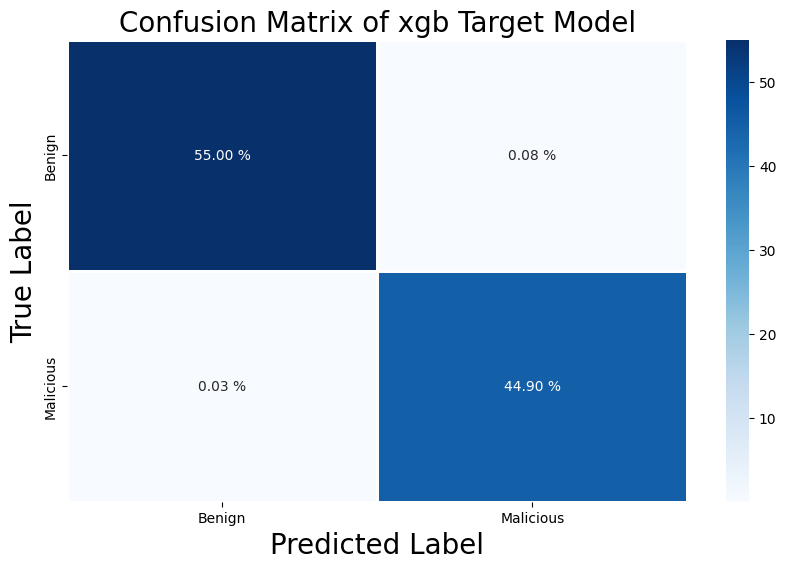

In [30]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
total = np.sum(cm )
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of xgb Target Model', fontsize=20)
plt.show()

### Save Model

In [31]:
import torch
import pickle

# save model
pickle.dump(model_dt, open("../target_model/ml_model/CICIDS2018target_dt.pickle", "wb")) # target_model\ml_model
pickle.dump(model_randomforest, open("../target_model/ml_model/CICIDS2018target_randomforest.pickle", "wb"))
pickle.dump(model_xgb, open("../target_model/ml_model/CICIDS2018target_xgb.pickle", "wb"))
pickle.dump(model_lr, open("../target_model/ml_model/CICIDS2018target_lr.pickle", "wb"))
# torch.save(model_dt.state_dict(), 'target/ml_model/model_dt.pth')
# torch.save(model_lr.state_dict(), 'target/ml_model/model_lr.pth')